In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Google_Plastore_cleaned data.csv")

In [3]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [4]:
df.isnull().sum().sum()

3180

In [5]:
df.isnull().sum().sort_values(ascending=False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Day                  0
Month                0
Year                 0
dtype: int64

In [6]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,1,6,2018


In [7]:
df=df.drop_duplicates()

In [8]:
df.shape

(10357, 16)

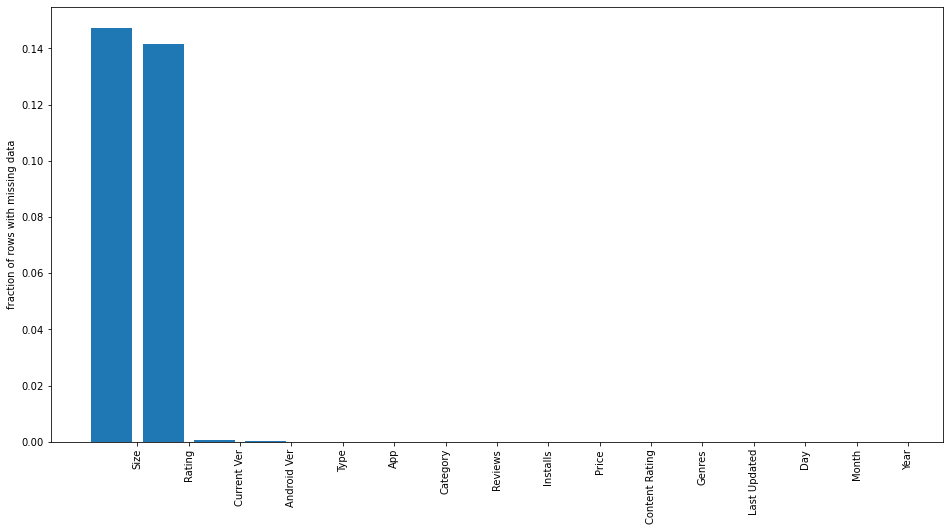

In [9]:
null_counts=df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation="vertical")
plt.ylabel("fraction of rows with missing data")
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

In [10]:
#percentage count
null_counts=df.isna().sum().sort_values(ascending=False)/len(df)
null_counts

Size              0.147340
Rating            0.141450
Current Ver       0.000772
Android Ver       0.000193
Type              0.000097
App               0.000000
Category          0.000000
Reviews           0.000000
Installs          0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Day               0.000000
Month             0.000000
Year              0.000000
dtype: float64

In [11]:
df_copy=df.copy()

In [12]:
cols=[var for var in df_copy.columns if df_copy[var].isnull().mean()*100]

In [13]:
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [14]:
df_copy[cols]

,Rating,Size,Type,Current Ver,Android Ver
0,4.1,19.0,Free,1.0.0,4.0.3 and up
1,3.9,14.0,Free,2.0.0,4.0.3 and up
2,4.7,8.7,Free,1.2.4,4.0.3 and up
3,4.5,25.0,Free,Varies with device,4.2 and up
4,4.3,2.8,Free,1.1,4.4 and up
...,...,...,...,...,...
10835,4.5,53.0,Free,1.48,4.1 and up
10836,5.0,3.6,Free,1.0,4.1 and up
10837,NaN,9.5,Free,1.0,2.2 and up
10838,4.5,NaN,Free,Varies with device,Varies with device


In [15]:
drop_df=df_copy[cols].dropna()

In [16]:
df_copy.shape

(10357, 16)

In [17]:
drop_df.shape

(7418, 5)

In [18]:
drop_df["Rating"]

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10832    4.8
10833    4.0
10835    4.5
10836    5.0
10839    4.5
Name: Rating, Length: 7418, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Density'>

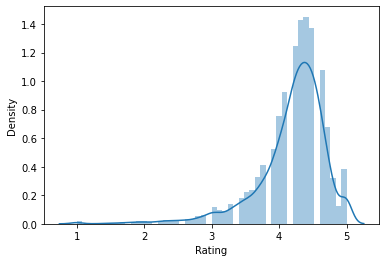

In [19]:
sns.distplot(df_copy["Rating"])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

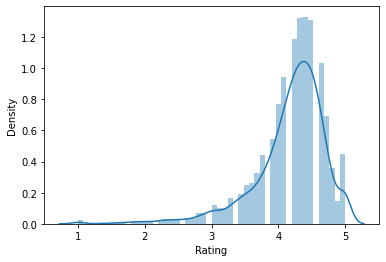

In [20]:
sns.distplot(drop_df["Rating"])

### mean median mode


In [21]:
df_copy_mean=df.copy()

In [55]:
df_mean=df_copy_mean["Size"].fillna(df_copy_mean["Size"].mean())

In [39]:
df_copy_mean["Size"].fillna(df_copy_mean["Size"].mean()).isnull().sum()

0

In [44]:
df_copy_mean["Size"].fillna(df_copy_mean["Size"].median())

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10835    53.0
10836     3.6
10837     9.5
10838    13.0
10839    19.0
Name: Size, Length: 10357, dtype: float64

In [45]:
df_copy_mean["Size"].fillna(df_copy_mean["Size"].median()).isnull().sum()

0

<AxesSubplot:xlabel='Size', ylabel='Density'>

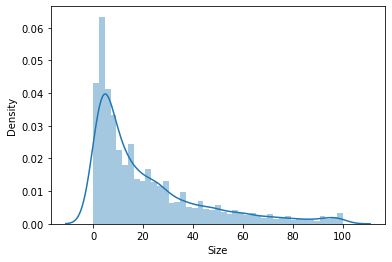

In [48]:
#check the dist distribution before 
sns.distplot(df["Size"])

<AxesSubplot:xlabel='Size', ylabel='Density'>

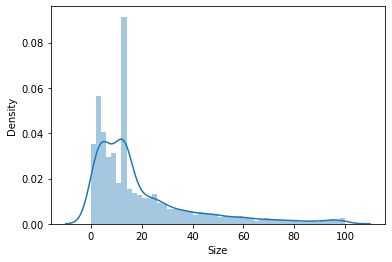

In [56]:
#distribution after missing value handle
sns.distplot(df_copy_mean["Size"].fillna(df_copy_mean["Size"].median()))

In [42]:
df_copy_mean["Rating"].fillna(df_copy_mean["Rating"].mean())

0        4.100000
1        3.900000
2        4.700000
3        4.500000
4        4.300000
           ...   
10835    4.500000
10836    5.000000
10837    4.187877
10838    4.500000
10839    4.500000
Name: Rating, Length: 10357, dtype: float64

In [43]:
df_copy_mean["Rating"].fillna(df_copy_mean["Rating"].mean()).isnull().sum()

0

In [46]:
df_copy_mean["Rating"].fillna(df_copy_mean["Rating"].median())

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10835    4.5
10836    5.0
10837    4.3
10838    4.5
10839    4.5
Name: Rating, Length: 10357, dtype: float64

In [47]:
df_copy_mean["Rating"].fillna(df_copy_mean["Rating"].median()).isnull().sum()

0

<AxesSubplot:xlabel='Rating', ylabel='Density'>

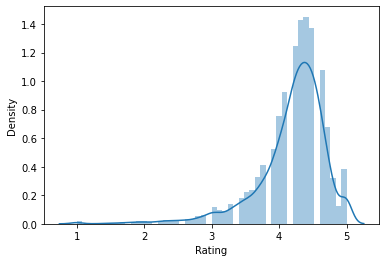

In [57]:
#distribution before median imputation
sns.distplot(df["Rating"])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

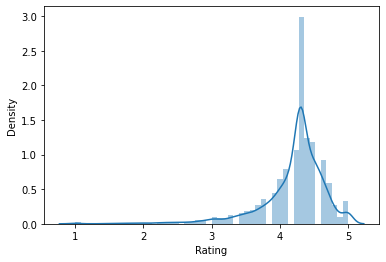

In [58]:
#distribution after missing value handle
sns.distplot(df_copy_mean["Rating"].fillna(df_copy_mean["Rating"].median()))

### Random sample imputation

In [25]:
df_random=df.copy()

In [26]:
df_random["Size"].isnull().sum()

1526

In [29]:
random_sample=df_random["Size"].dropna().sample(df_random["Size"].isnull().sum())

In [30]:
random_sample

2326     16.0
3923     34.0
5170     29.0
10267    79.0
1655     74.0
         ... 
1982     75.0
5906      5.5
1102      7.4
8150     17.0
9426     27.0
Name: Size, Length: 1526, dtype: float64

In [31]:
random_sample.index=df_random["Size"].dropna().sample(df_random["Size"].isnull().sum()).index

In [32]:
random_sample.index

Int64Index([ 8836,  7659,  9678, 10441,  4326,  9245,  1556, 10461,  7879,
             5016,
            ...
              611,  2541,   776,  1926,  7029,  4857,  9582,   516,  1282,
             4334],
           dtype='int64', length=1526)

In [35]:
df_random.loc[df_random["Size"].isnull(),"Size"]=random_sample

In [36]:
random_sample

8836     16.0
7659     34.0
9678     29.0
10441    79.0
4326     74.0
         ... 
4857     75.0
9582      5.5
516       7.4
1282     17.0
4334     27.0
Name: Size, Length: 1526, dtype: float64